In [1]:
#!/usr/bin/env python
import sys,os
#print sys.path
sys.path=["/home/zhi/SULI21","/home/zhi/april/py"]+sys.path
print(sys.path)
from Parameter import Parameter
from BaseLikelihood import BaseLikelihood
import MCMCAnalyzer
import numpy as np
import quasim as qua
import math
import matplotlib.pyplot as plt

['/home/zhi/SULI21', '/home/zhi/april/py', '', '/usr/lib/python2.7', '/usr/lib/python2.7/plat-x86_64-linux-gnu', '/usr/lib/python2.7/lib-tk', '/usr/lib/python2.7/lib-old', '/usr/lib/python2.7/lib-dynload', '/home/zhi/.local/lib/python2.7/site-packages', '/home/zhi/.local/lib/python2.7/site-packages/montepython-2.2.2-py2.7.egg', '/home/zhi/.local/lib/python2.7/site-packages/pymultinest-2.9-py2.7.egg', '/usr/local/lib/python2.7/dist-packages', '/usr/local/lib/python2.7/dist-packages/pymultinest-2.9-py2.7.egg', '/usr/lib/python2.7/dist-packages', '/home/zhi/.local/lib/python2.7/site-packages/IPython/extensions', '/home/zhi/.ipython']


In [3]:
class testLike(BaseLikelihood):
    
    def __init__(self):
        BaseLikelihood.__init__(self,"testlike")   #give it a name testlike
        self.x=0
        self.y=0

    def freeParameters(self):
        return [Parameter("x",0.1, err=1, bounds=(0,2),),Parameter("y",0, err=1)]

    def updateParams(self,params):    #params is also a class, updates param value.
        for p in params:
            if p.name=="x":
                self.x=p.value
            if p.name=="y":
                self.y=p.value

    def loglike_wprior(self):
        x=self.x
        y=self.y
        return (-(x**2+y**2-x*y)/2.)     #prior loglikelihood

L=testLike()
MCMCAnalyzer.MCMCAnalyzer(L,"/home/zhi/SULI21/MCMC_output/output_test",temp=2, nsamp=300000)


('Bounds:', array([ 0, -5]), array([2, 5]))
Starting chain...
('Accepted samples', 1000, 1)
('Accepted samples', 2000, 1)
('Accepted samples', 3000, 1)
('Accepted samples', 4000, 1)
('Accepted samples', 5000, 1)
Re-initializing covariance matrix after burn-in
[[0.24636149 0.07528309]
 [0.07528309 1.89437126]]
('x', 0.7757090910678366, 0.49634815299362317)
('y', -0.09741594810926331, 1.3763616030002093)
('New maxloglike', -0.26738985249204444)
('outstr', '0.874856919780720 0.267389852492044 0.729945192280882 -0.002674948640710 \n')
('New maxloglike', -0.14562151963910927)
('outstr', '2.789330293503060 0.145621519639109 0.616484847373395 0.229484160644210 \n')
('New maxloglike', -0.09091428518926631)
('outstr', '1.911121109080878 0.090914285189266 0.324856631410780 0.482865044483261 \n')
('New maxloglike', -0.08088806971223801)
('outstr', '3.841451639423576 0.080888069712238 0.285781912420249 -0.174162136070246 \n')
('New maxloglike', -0.049484975048048385)
('outstr', '0.975561098839104 

KeyboardInterrupt: 

In [2]:
# Input data
QT = qua.QuaTel()
BSC = qua.BSC_process("/home/zhi/SULI21/bsc5.dat")

lam = 1*10**(-6)
#NEW YORK COORD but the overall baseline is E-W, with B ~ 190m
pos_t_NY = [[-1.3,0.71,6.4*10**(6)],[-1.30004,0.71,6.4*10**(6)]]   #Baseline vector in [RA,DEC,RADIUS]
pos = BSC.BSC_filter(pos_t_NY,3)
# Use some sample pos, here I use sample pos[0] as a sample star
print('pos16',pos[16])
T = 20000     # try for 3000s first

num, t, baseline, theo_phase, d_source = QT.get_num_photon(pos[16],pos_t_NY,lam,T,'pos')
f_t, new_t = QT.freq_func(theo_phase,t)
num = num[0] # Lets simulate data for one star only, and implement multiple stars if needed
theo_phase = theo_phase[0]

task4 = qua.sim_data(num*10,t,theo_phase,'pos')   
print('theo_d',d_source[0,0,:])



('pos16', array([[5.06200000e+03, 3.51345687e+00, 9.59722619e-01, 9.05944064e+01],
       [5.05400000e+03, 3.50778455e+00, 9.58626940e-01, 4.49884866e+02]]))
('theo_d', array([ 0.00201149, -0.00271418,  0.00062913]))


In [1]:
def theo_ds(pos, theo):  #pos in [#,phi,dec,s] find midpoint theta and phi.
    
    pos[:,2] = np.pi/2. - pos[:,2]
    print('theo_pos',pos)
    x = np.sin(pos[:,2])*np.cos(pos[:,1])
    y = np.sin(pos[:,2])*np.sin(pos[:,1])
    z = np.cos(pos[:,2])
    #print(x,y,z)
    r = np.linalg.norm(np.array([x[0]+x[1],y[0]+y[1],z[0]+z[1]])/2)
    s = np.linalg.norm(np.array([x[0]+x[1],y[0]+y[1]])/2)
    phi = math.atan2((x[0]+x[1]),(y[0]+y[1]))
    #d_ew = (s/r)*(pos[0,1]-pos[1,1])  # using midpoint
    #d_ew = np.sin(pos[0,2])*pos[0,1]-np.sin(pos[0,2])*pos[1,1]   #actual
    d_ra = (pos[0,1]-pos[1,1])     #+ 3.375e-9
    d_dec = (pos[0,2] - pos[1,2])  #- 2.89902e-9
    
    # Use theo d_source in cart to convert to d_ns and d_ew
    d_dec_theo = -theo[2]*r/s
    
    new_x = (((z[0]+z[1])/2)/r)*d_dec_theo
    
    d_ew_x = (theo[0]+np.cos(np.pi/2 + phi)*new_x)/(np.sin(-(np.pi/2 + phi)))
    
    d_ew_y = (-theo[1]-np.sin(-(np.pi/2 + phi))*new_x)/(np.cos(np.pi/2 + phi))
    
    d_ra_theo = d_ew_x*r/s    
    
    print('diff in RA', d_ra - d_ra_theo)
    print('diff in DEC', d_dec - d_dec_theo)
    
    return d_dec, d_ra, d_dec_theo, d_ra_theo


#a =theo_ds(pos[16],d_source[0,0,:])
#print(a)

#[0.0056273205,-0.001095679]
d_dec, d_ra, d_dec_theo, d_ra_theo = theo_ds(pos[16],d_source[0,0,:])
theo_par = [task4.V,d_ra_theo,d_dec_theo]
print('theo_par',theo_par)


NameError: name 'pos' is not defined

In [53]:
# sim_data class

class sim_data(BaseLikelihood):
    
    def __init__(self, seed, pos_t, pos_s, t, lam):  # seed = [V_init,d_ra_init, d_dec_init]
        BaseLikelihood.__init__(self,"sim_data")  
        
        # free par
        self.seed = seed
        self.V = seed[0]
        self.d_ra = seed[1]
        self.d_dec = seed[2]
        
        # fixed values
        self.t = t             # timestamp for the sim data
        
        pos_t = np.array(pos_t)
        pos_t[:,1] = np.pi/2 - pos_t[:,1]   # baseline vector in spherical baseline [[phi,theta,r],[phi,theta,r]]
        self.pos_t = pos_t     # position of the two telescope in Earth coordinate
        
        pos_s = np.delete(pos_s, 0, axis=1)  # delete star # part.
        pos_s[:,1] = np.pi/2 - pos_s[:,1]
        self.pos_s = pos_s     # position of sources to determine midpoint
        
        self.lam = lam         # lambda for observation
        self.Omega_E = 7.292e-5
        
    def freeParameters(self):
        return [Parameter("V", self.seed[0], err=0.001, bounds=(0.2,0.35),),
                Parameter("d_ra",self.seed[1], err=1e-7),
                Parameter("d_dec",self.seed[2], err=1e-7)]

    def updateParams(self,params):    #params is also a class, updates param value.
        for p in params:
            if p.name=="V":
                self.V=p.value
            if p.name=="d_ra":
                self.d_ra=p.value
            if p.name=="d_dec":
                self.d_dec=p.value

    def pos_carte(self, ti):
            # rotate baseline vector as func of time
            
            if (ti == 0.0).all() :   # for pos source
                x = np.sin(self.pos_s[:,1])*np.cos(self.pos_s[:,0])
                y = np.sin(self.pos_s[:,1])*np.sin(self.pos_s[:,0])
                z = np.cos(self.pos_s[:,1])
               
                r = np.linalg.norm(np.array([x[0]+x[1],y[0]+y[1],z[0]+z[1]])/2)
                s = np.linalg.norm(np.array([x[0]+x[1],y[0]+y[1]])/2)
    
                # close to theoretical d_ns and d_ew
                d_ew = s/r * self.d_ra
                d_ns = self.d_dec
                
                
                #converting to Earth coord
                #rotate around d_ew axis, y axis
                fin_z = (s/r)*d_ns
                new_x = (((z[0]+z[1])/2)/r)*d_ns    #multiplied by d_ew and d_ns
                
                # rotate around z axis
                phi = math.atan2((x[0]+x[1]),(y[0]+y[1]))
                fin_x = np.cos(np.pi/2 + phi)*new_x - np.sin(-(np.pi/2 + phi))*d_ew
                fin_y = np.sin(-(np.pi/2 + phi))*new_x + np.cos(np.pi/2 + phi)*d_ew
                
                new_pos = -np.array([fin_x,fin_y,fin_z])    # since theta hat points down

                return new_pos
            
            else:
                N = ti.size 
                M = len(pos)
                
                new_t = np.tile(ti,(2,1))   # (2,N)
            
                pos_tile = np.tile(np.reshape(self.pos_t,(2,1,3)),(1,N,1))    #pos of telescope, 2,N,3
                
                new_pos = np.zeros((2,N,3))
            
                #change from spherical to cartesian
                new_pos[:,:,0] = pos_tile[:,:,2]*np.sin(pos_tile[:,:,1])*np.cos(pos_tile[:,:,0] + self.Omega_E*new_t)   #[x,y,z](t)
                new_pos[:,:,1] = pos_tile[:,:,2]*np.sin(pos_tile[:,:,1])*np.sin(pos_tile[:,:,0] + self.Omega_E*new_t)
                new_pos[:,:,2] = pos_tile[:,:,2]*np.cos(pos_tile[:,:,1])     

                return new_pos
    
    
    def get_phase(self):       #pos:[[[ra,dec,r],[ra,dec,r]],[[],[]]]

        #let ds be differene of source unit vector
        ds_car = self.pos_carte(np.array([0.]))                   #(3)
        #print(ds_car)
        new_pos_t = self.pos_carte(self.t)           #(2,N,3)
        baseline = new_pos_t[1] - new_pos_t[0]      #(3,N)
        #print(baseline)
        dot = baseline[:,0]*ds_car[0] + baseline[:,1]*ds_car[1] + baseline[:,2]*ds_car[2]
        phase = 2*np.pi/self.lam*dot
        
        return phase
    
    
    
    def loglike_wprior(self):
        
        phase = self.get_phase()
        loglike = np.log(1+self.V*np.cos(phase))  #get loglike for diff phase in 2d array[[],[],[]...]
    
        res = np.sum(loglike, axis=None)
        
        return res
    
    
    


In [59]:
pos = BSC.BSC_filter(pos_t_NY,3)


ra = (pos[16][0,1]-pos[16][1,1])     #+ 3.375e-9
dec = (pos[16][0,2] - pos[16][1,2])

par = [0.27, ra, dec]


print(pos[16])
L=sim_data(theo_par,pos_t_NY,pos[16],task4.timestamp,lam)
L.loglike_wprior()

[[5.06200000e+03 3.51345687e+00 9.59722619e-01 9.05944064e+01]
 [5.05400000e+03 3.50778455e+00 9.58626940e-01 4.49884866e+02]]


5.560042566711523

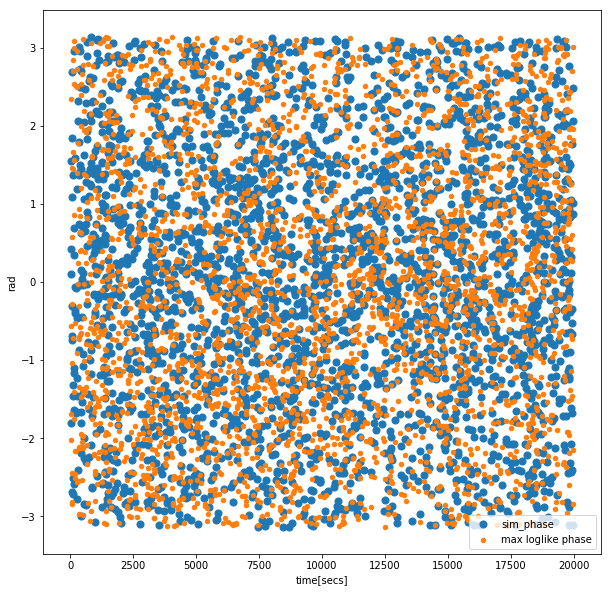

In [21]:
plt.figure(figsize=(10,10))
#plt.subplot(2,2,1)
#plt.plot(t[:1000000], np.mod((theo_phase[:1000000]+ np.pi),2*np.pi) - np.pi, color = 'g',label='theo phase curve')
plt.scatter(task4.timestamp[-30000:],np.mod((task4.phase[-30000:]+ np.pi),2*np.pi) - np.pi,s=50, label = 'sim_phase')
plt.scatter(task4.timestamp[-30000:], np.mod((L.get_phase()[-30000:]+ np.pi),2*np.pi) - np.pi, s= 20,label = 'max loglike phase')
plt.xlabel('time[secs]');plt.ylabel('rad')
#plt.xlim([3.4,4])
plt.legend()

In [60]:
MCMCAnalyzer.MCMCAnalyzer(L,"/home/zhi/SULI21/MCMC_output/sim_data",temp=2, nsamp=300000)

('Bounds:', array([ 0.2       ,  0.00567183, -0.00109618]), array([ 0.35      ,  0.00567283, -0.00109518]))
Starting chain...
Still burning in, weight too large
891
Still burning in, weight too large
279
Still burning in, weight too large
441
Still burning in, weight too large
72
Still burning in, weight too large
60
Still burning in, weight too large
56
Still burning in, weight too large
109
Still burning in, weight too large
312
Still burning in, weight too large
88
Still burning in, weight too large
61
Still burning in, weight too large
70
Still burning in, weight too large
79
Still burning in, weight too large
99
Still burning in, weight too large
40
Still burning in, weight too large
52
Still burning in, weight too large
52
Still burning in, weight too large
35
Still burning in, weight too large
46
Still burning in, weight too large
41
Still burning in, weight too large
41
Still burning in, weight too large
40
Still burning in, weight too large
109
Still burning in, weight too lar

('Accepted samples', 176000, 1)
('Accepted samples', 177000, 1)
('Accepted samples', 178000, 1)
('Accepted samples', 179000, 2)
('Accepted samples', 180000, 1)
('Accepted samples', 181000, 1)
('Accepted samples', 182000, 3)
('Accepted samples', 183000, 4)
('Accepted samples', 184000, 1)
('Accepted samples', 185000, 3)
('Accepted samples', 186000, 8)
('Accepted samples', 187000, 7)
('Accepted samples', 188000, 3)
('Accepted samples', 189000, 1)
('Accepted samples', 190000, 2)
('Accepted samples', 191000, 2)
('Accepted samples', 192000, 11)
('Accepted samples', 193000, 2)
('Accepted samples', 194000, 1)
('Accepted samples', 195000, 1)
('Accepted samples', 196000, 1)
('Accepted samples', 197000, 2)
('Accepted samples', 198000, 2)
('Accepted samples', 199000, 9)
('Accepted samples', 200000, 1)
('Accepted samples', 201000, 1)
('Accepted samples', 202000, 1)
('Accepted samples', 203000, 5)
('Accepted samples', 204000, 2)
('Accepted samples', 205000, 2)
('Accepted samples', 206000, 2)
('Accep

<MCMCAnalyzer.MCMCAnalyzer instance at 0x7efcf5e3f460>

In [51]:
a = np.array([0.002323004332,0.32123423232323])
np.set_printoptions(precision=15)
a = tuple([2.223232323233,3.23232323232322])
print('%0.15f ' '%0.15f'  %a)


2.223232323233000 3.232323232323220
